In [1]:
import numpy as np
import pandas as pd
import pytz
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

%matplotlib inline

instantiate date/time objects

In [6]:
x = pd.to_datetime("2024-05-06")
x = pd.to_datetime("2024-05-06 23:00:00+08:00")
x = pd.to_datetime("2024-05-06 23:00:00").tz_localize("UTC")
x.tz_localize("America/Chicago")
x.tz_convert("Asia/Hong_Kong")
x.value # timestampe value in ns

# datetime index
dates = pd.date_range('2024-01-01', '2024-12-31', freq="WOM-3FRI")
dates = pd.date_range('2024-01-01', '2024-12-31', freq="B")

In [30]:
df = pd.DataFrame(index=dates, data=dates)

In [ ]:
df.resample('1M').agg('first')

shift time/ date

In [ ]:
x + timedelta()
x + relativedelta(months=3)

example in shifting data

In [43]:
dates = pd.date_range('2024-01-01', '2024-12-31', freq='B')
data = np.random.standard_normal(len(dates))
df = pd.DataFrame(index=dates, data=data, columns=['original'])

In [60]:
df['rolling_mean'] = df['original'].rolling(5).mean()
df['pct_change'] = df['original'].pct_change()

<font size=5>simple stock plot

In [34]:
df_raw = pd.read_csv('sample_data/msft_price.csv')
df = pd.DataFrame(df_raw)

In [35]:
df['50d_rolling_avg'] = df['Close'].rolling(50).mean()
df['100d_rolling_avg'] = df['Close'].rolling(100).mean()
df['200d_rolling_avg'] = df['Close'].rolling(200).mean()

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# df.dropna(inplace=True)

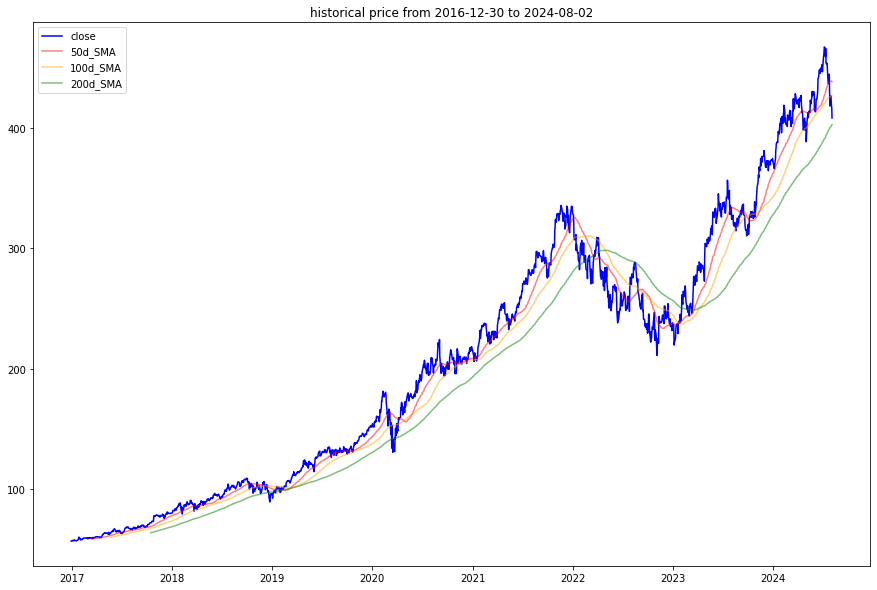

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(df.index, df['Close'], color='blue', label='close')
plt.plot(df.index, df['50d_rolling_avg'], color = 'red', alpha=0.5, label='50d_SMA')
plt.plot(df.index, df['100d_rolling_avg'], color='orange', alpha=0.5, label='100d_SMA')
plt.plot(df.index, df['200d_rolling_avg'], color='green', alpha=0.5, label='200d_SMA')
plt.title(
    "historical price from {} to {}".format(
        str(df.index.min().date()),
        str(df.index.max().date())
    )
    )
plt.legend()
plt.show()